# visualize sarcasm headlines dataset

In [1]:
%matplotlib inline
import pandas as pd

df = pd.read_json('./Sarcasm_Headlines_Dataset.json', lines=True)
#df.to_csv('./headlines.csv', index=False)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [3]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [4]:
df.duplicated().sum()

2

In [5]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


array([[<Axes: title={'center': 'is_sarcastic'}>]], dtype=object)

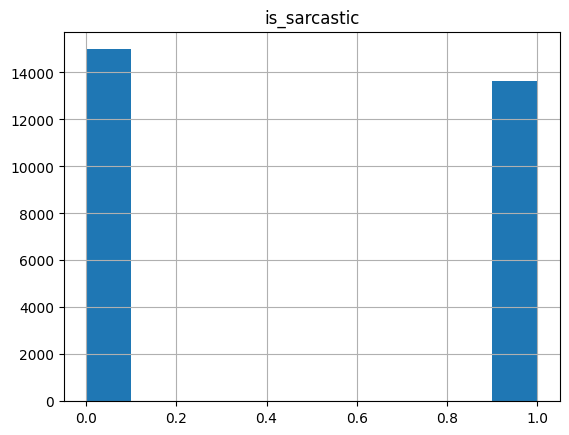

In [6]:
df.hist()

<Axes: ylabel='count'>

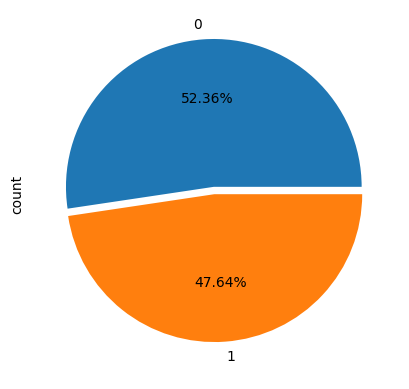

In [7]:
df['is_sarcastic'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0.05, 0])

# 1 : sarcastic
# 0 : not sarcastic

In [8]:
df = df.drop(['article_link'], axis=1)
df.drop_duplicates(subset=['headline'], inplace = True)

# pre-process dataset [clean stemmwords, remove stopwords, etc.]

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
#from unidecode import unidecode
import collections
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [10]:
origin = df['headline']
df['headline'] = df['headline'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))
df['headline'] = df['headline'].apply(lambda x: re.sub('\s+', ' ', x).strip())

In [11]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Turgut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Turgut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

df['headline'] = df['headline'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x.lower()) if word not in stop_words]))
df['headline']

0        thirtysometh scientist unveil doomsday clock h...
1        dem rep total nail congress fall short gender ...
2                            eat veggi delici differ recip
3                  inclement weather prevent liar get work
4         mother come pretti close use word stream correct
                               ...                        
28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci d...
28616          beauti accept speech week came queer korean
28617       mar probe destroy orbit spielbergg space palac
28618                                dad clarifi food stop
Name: headline, Length: 28503, dtype: object

In [13]:
import matplotlib.pyplot as plt

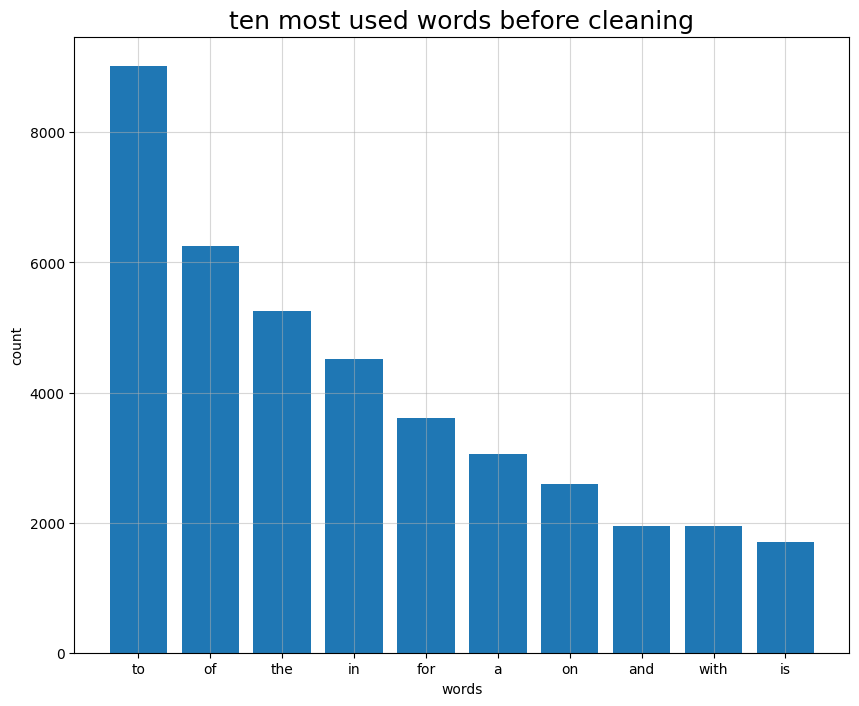

In [14]:
words = []
for text in origin:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.figure(figsize = (10, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('ten most used words before cleaning', fontsize = 18)
plt.xlabel('words')
plt.ylabel('count')
plt.show()

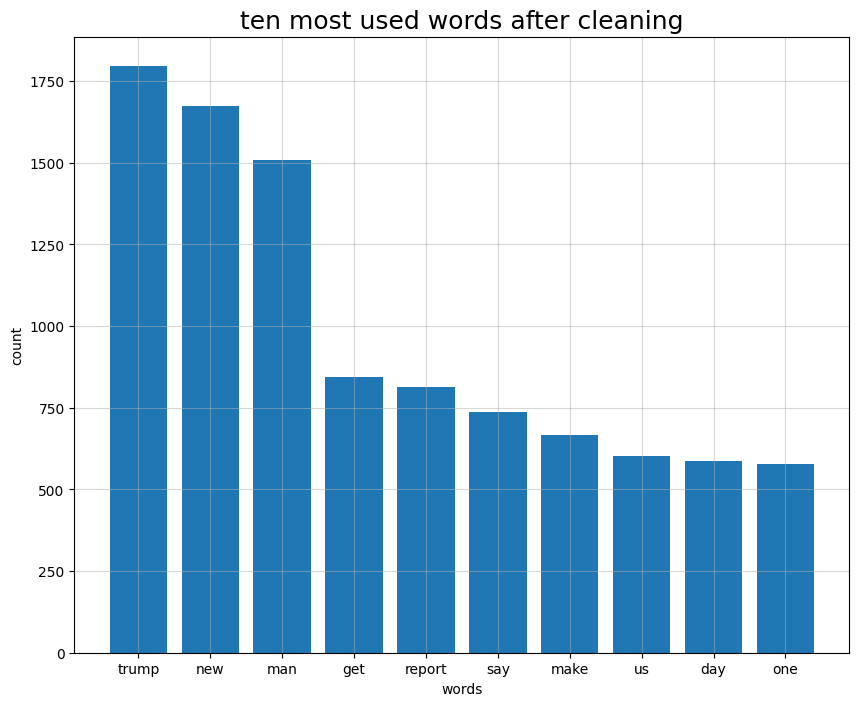

In [15]:
words = []
for text in df['headline']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))
plt.figure(figsize = (10, 8))
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.grid(alpha = 0.5)
plt.title('ten most used words after cleaning', fontsize = 18)
plt.xlabel('words')
plt.ylabel('count')
plt.show()

In [16]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28503 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28503 non-null  int64 
 1   headline      28503 non-null  object
dtypes: int64(1), object(1)
memory usage: 668.0+ KB


In [ ]:
df = df.dropna(axis=0)

In [18]:
df.to_csv('./headlines.csv', index=False)
#df.to_json('./headlines.json', index=False)